In [4]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
df = pd.read_csv('NYC_Restaurants.csv', dtype=str)
df.iloc[0]

Unnamed: 0                                                               0
CAMIS                                                             30112340
DBA                                                                WENDY'S
BORO                                                              BROOKLYN
BUILDING                                                               469
STREET                                                     FLATBUSH AVENUE
ZIPCODE                                                              11225
PHONE                                                           7182875005
CUISINE DESCRIPTION                                             Hamburgers
INSPECTION DATE                                                 12/30/2014
ACTION                     Violations were cited in the following area(s).
VIOLATION CODE                                                         06C
VIOLATION DESCRIPTION    Food not protected from potential source of co...
CRITICAL FLAG            

Question 1

In [11]:
df['RESTAURANT'] = df[['DBA', 'BUILDING', 'STREET', 'ZIPCODE', 'BORO' ]].agg(' '.join, axis=1)
df['RESTAURANT'][:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

Question 2

In [40]:
df['ADDRESS'] = df[['BUILDING', 'STREET', 'ZIPCODE', 'BORO' ]].agg(' '.join, axis=1)
len(df['ADDRESS'].drop_duplicates())

9639

Question 3

In [88]:
restaurant = df[['DBA','ADDRESS']].drop_duplicates(subset = 'ADDRESS')['DBA'].value_counts()
len(restaurant[restaurant>1])

351

Qestion 4

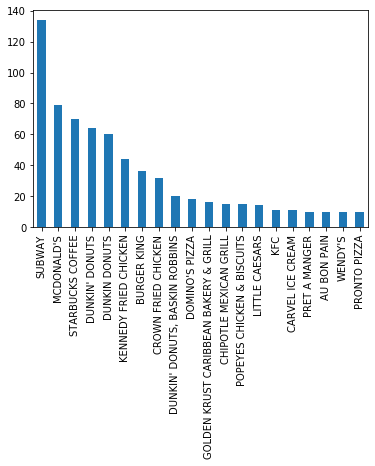

In [47]:
df[['DBA','ADDRESS']].drop_duplicates(subset = 'ADDRESS')['DBA'].value_counts()[:20].plot(kind='bar')

In [52]:
len(restaurant[restaurant>1]) / len(df['ADDRESS'].drop_duplicates())

0.036414565826330535

In [66]:
mask = (df['BORO'] == 'missing')
df.loc[mask, 'BORO'] = np.nan

non_chain = df[['DBA','ADDRESS','BORO']].drop_duplicates(subset = 'ADDRESS')[['DBA','BORO']]
non_chain

,DBA,BORO
0,WENDY'S,BROOKLYN
5,TOV KOSHER KITCHEN,QUEENS
9,BRUNOS ON THE BOULEVARD,QUEENS
16,MAY MAY KITCHEN,BROOKLYN
22,SEUDA FOODS,BROOKLYN
...,...,...
44621,Andy's Cuisine Restaurant,BRONX
44622,YUMMY SZECHUAN HOUSE,QUEENS
44627,NEW WORLD FAST FOOD,QUEENS
44628,EARLY,BROOKLYN


In [ ]:
restaurant[restaurant==1]['boro']
non_chain.loc[mask, 'BORO'] = np.nan     .value_counts()
  